In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
train_data=pd.read_csv("D:\\train.csv")
test_data=pd.read_csv("D:\\test.csv")
sample_submission=pd.read_csv('D:\\sample_submission.csv')


In [2]:
train_data.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [3]:
test_data.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [5]:
train_data=train_data.drop("id",axis=1)
test_data=test_data.drop("id",axis=1)

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    20775 non-null  object 
 1   loading         20552 non-null  float64
 2   attribute_0     20775 non-null  object 
 3   attribute_1     20775 non-null  object 
 4   attribute_2     20775 non-null  int64  
 5   attribute_3     20775 non-null  int64  
 6   measurement_0   20775 non-null  int64  
 7   measurement_1   20775 non-null  int64  
 8   measurement_2   20775 non-null  int64  
 9   measurement_3   20446 non-null  float64
 10  measurement_4   20366 non-null  float64
 11  measurement_5   20267 non-null  float64
 12  measurement_6   20151 non-null  float64
 13  measurement_7   20055 non-null  float64
 14  measurement_8   19929 non-null  float64
 15  measurement_9   19871 non-null  float64
 16  measurement_10  19708 non-null  float64
 17  measurement_11  19639 non-null 

In [7]:
train_data.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [8]:
test_data.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,20552.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20446.000000,20366.000000,20267.000000,20151.000000,...,19929.000000,19871.000000,19708.000000,19639.000000,19535.000000,19472.000000,19335.000000,19233.000000,19097.000000,19035.000000
mean,127.634895,7.733959,6.196823,7.453574,8.962407,6.126931,17.793466,11.727331,17.138080,17.515797,...,19.030765,11.417921,16.123986,18.846571,11.914230,15.736104,16.123958,15.115915,16.636052,701.389816
std,39.154642,1.308535,1.917478,4.274477,4.334200,3.835881,1.002206,1.006834,1.008714,1.000067,...,1.005401,0.999953,1.565414,1.588642,1.363253,1.357019,1.410569,1.545069,1.643463,130.205829
min,37.700000,6.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.215000,13.539000,...,14.885000,7.578000,9.167000,13.127000,6.116000,9.209000,8.415000,8.417000,10.162000,1.671000
25%,99.470000,6.000000,4.000000,4.000000,6.000000,3.000000,17.119000,11.048250,16.457000,16.847000,...,18.351000,10.744000,15.095000,17.714000,11.069000,14.871000,15.238000,14.082000,15.512000,618.723500
50%,122.110000,7.000000,5.000000,7.000000,9.000000,6.000000,17.789000,11.729000,17.132000,17.510000,...,19.040000,11.414000,16.109500,18.810000,11.941000,15.734000,16.119000,15.062000,16.706000,701.379000
75%,148.840000,9.000000,7.000000,10.000000,12.000000,8.000000,18.478000,12.411000,17.824500,18.197000,...,19.707000,12.093000,17.156000,19.967500,12.791000,16.605000,17.001500,16.107000,17.781000,784.872500
max,385.570000,9.000000,9.000000,30.000000,33.000000,28.000000,21.389000,15.623000,21.681000,21.183000,...,23.092000,15.091000,23.354000,24.950000,18.962000,21.677000,23.140000,22.097000,22.270000,1242.786000


In [9]:
train_data.shape

(26570, 25)

In [10]:
test_data.shape

(20775, 24)

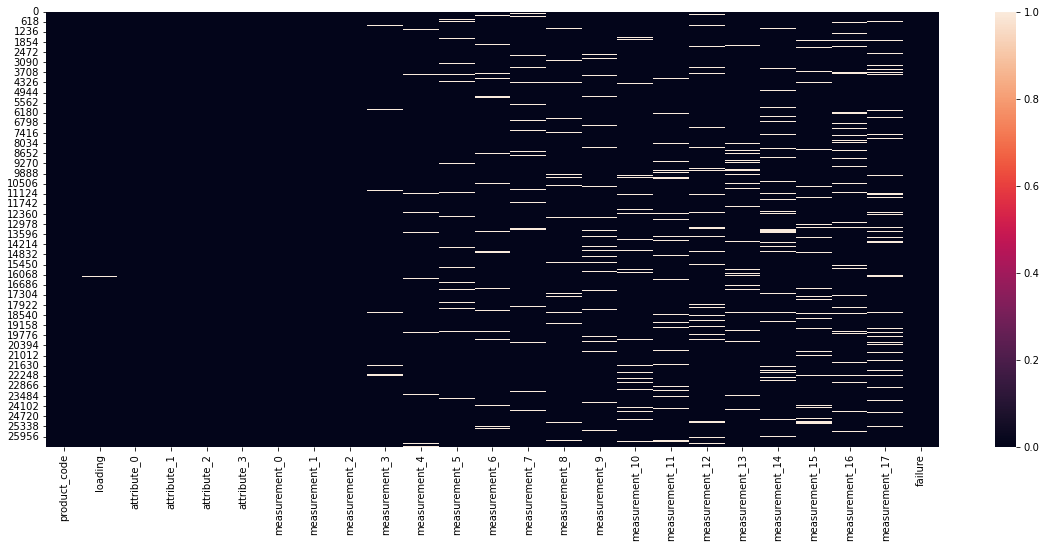

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(train_data.isnull())
plt.show()

In [12]:
train_data.isnull().sum()

product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

#### most features in training data have null

In [13]:
test_data.isnull().sum()

product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

### also in test data have many features contains null

# Filling Missing Data with mean()

In [14]:
columns_missing_data=['loading','measurement_3','measurement_4','measurement_5','measurement_6','measurement_7','measurement_8','measurement_9','measurement_10','measurement_11','measurement_12','measurement_13','measurement_14','measurement_15','measurement_16','measurement_17']


In [15]:
for i in columns_missing_data:
    train_data[i]=train_data[i].fillna(train_data[i]).mean()
    test_data[i]=test_data[i].fillna(test_data[i]).mean()
    


In [16]:
train_data.isnull().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

In [17]:
test_data.isnull().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

# plot categorical feature

In [18]:
categorical_columns=["product_code","attribute_0","attribute_1"]

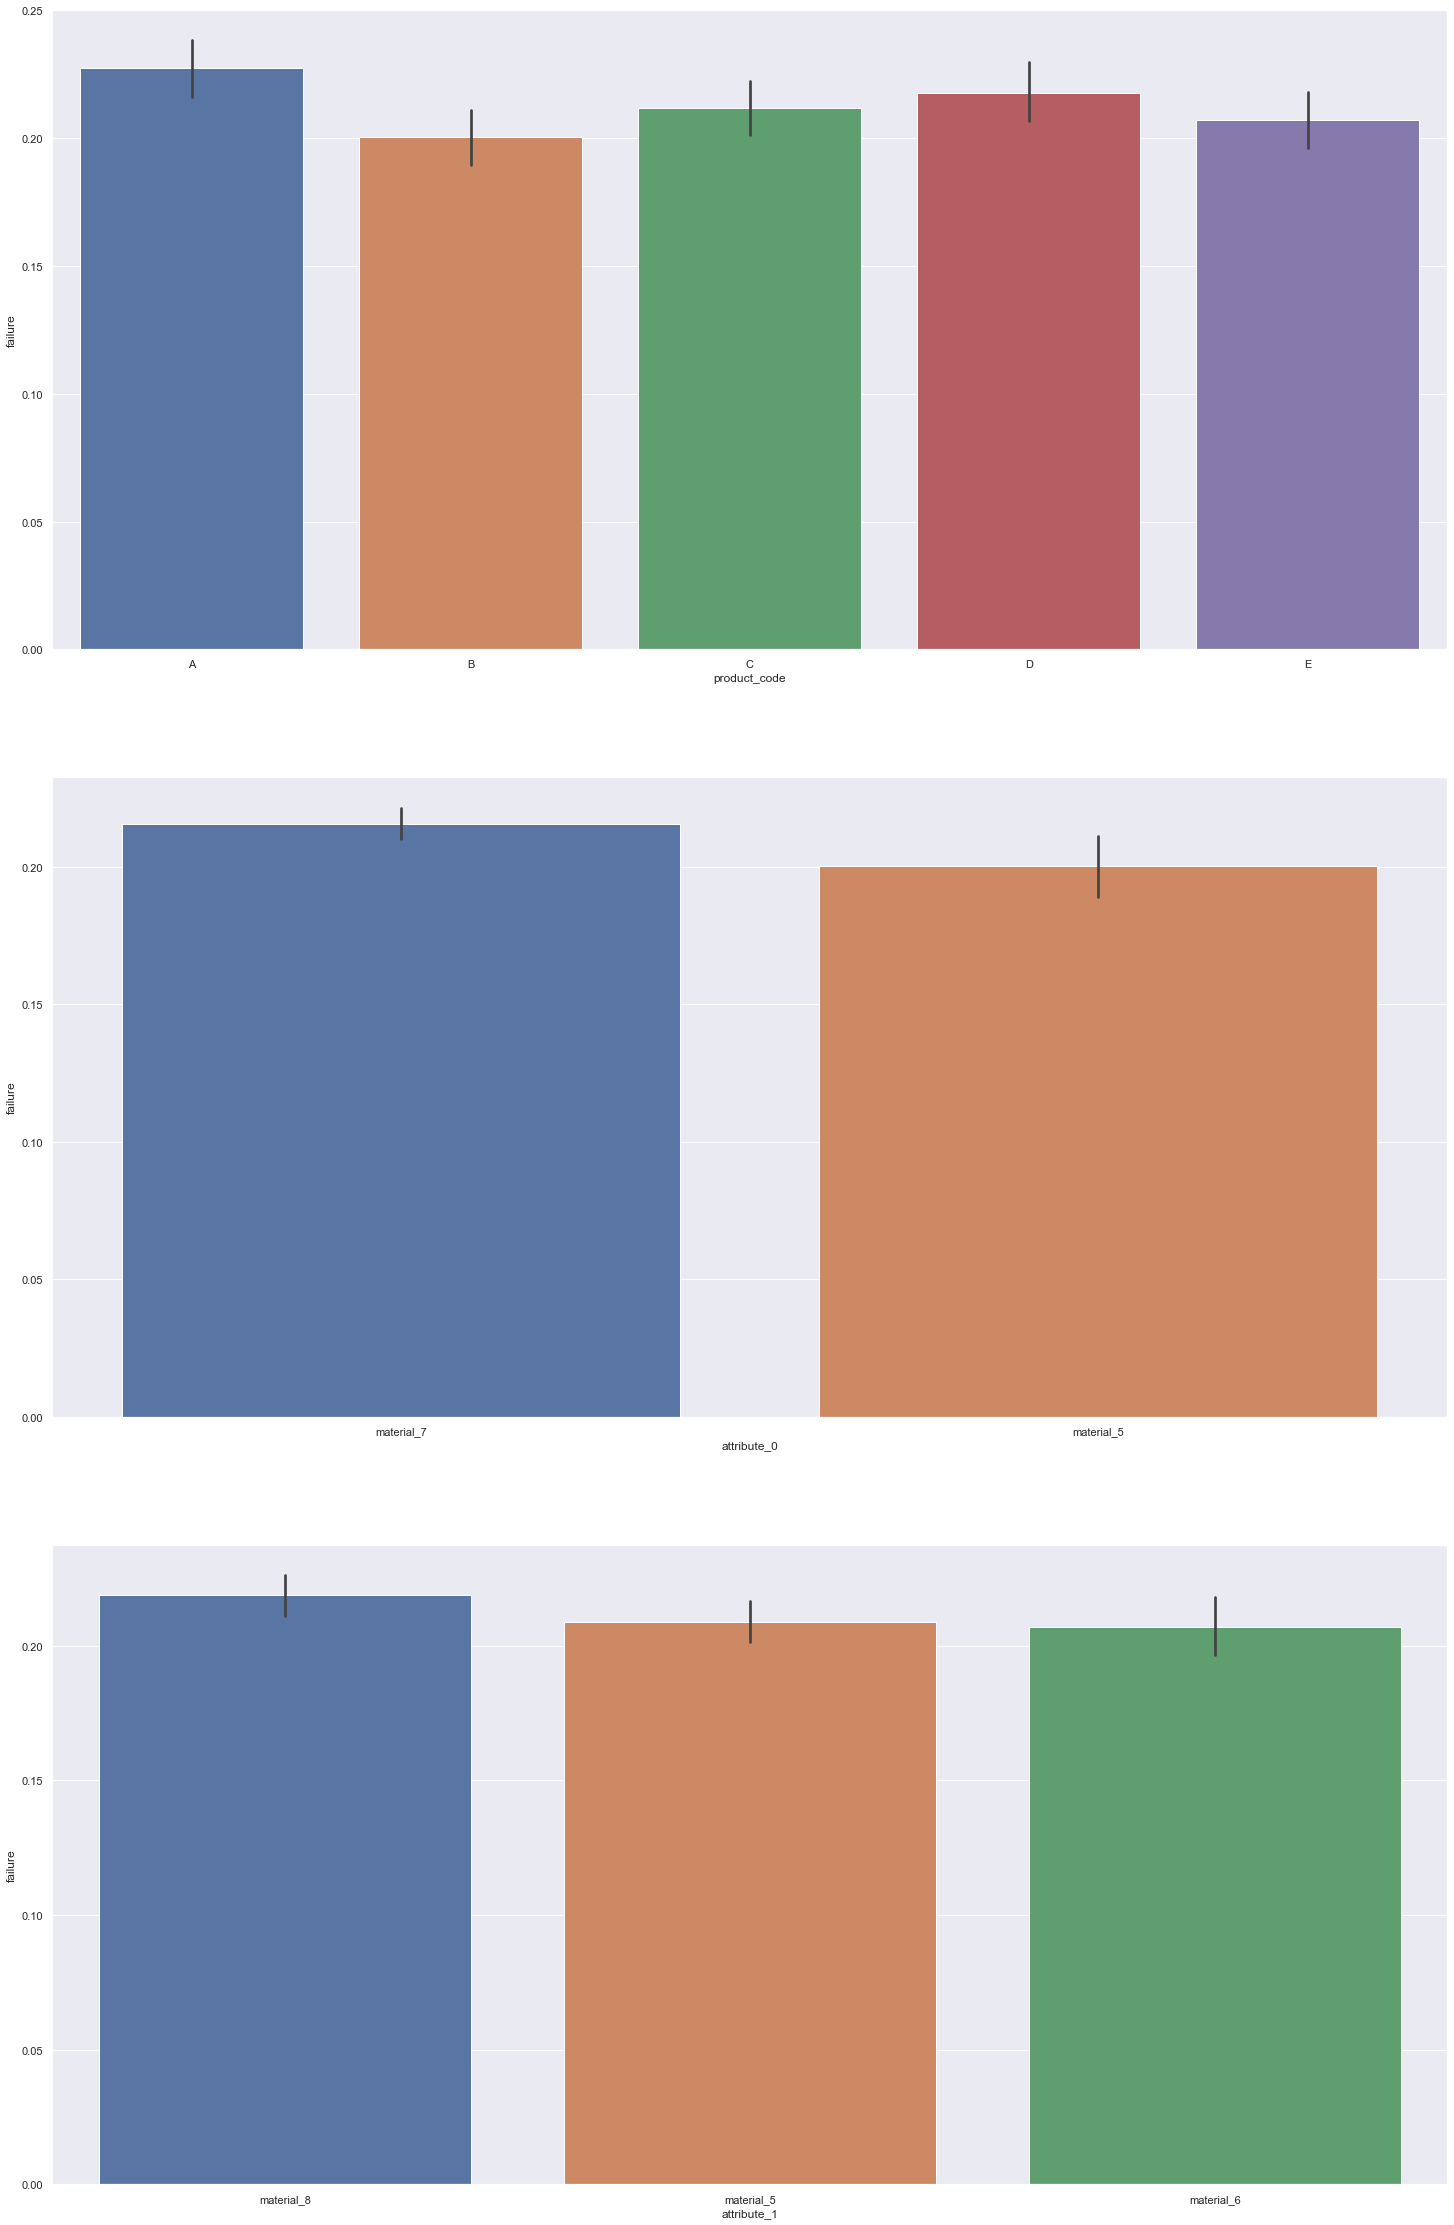

In [19]:
sns.set(rc={'figure.figsize':(15,8)})
plt.figure(figsize= (25,40))
for i,col in enumerate(categorical_columns):
    plt.subplot(3,1,i+1)
    sns.barplot(x=col, y="failure", data=train_data)

In [20]:
## plot numercial feature vs

In [21]:
Numerical_columns=numeric_columns = train_data.select_dtypes(include=['int64','float64']).drop("failure",axis=1)

In [22]:
numeric_columns.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,127.826233,9,5,7,8,4,17.791528,11.731988,17.127804,17.510759,...,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059
1,127.826233,9,5,14,3,3,17.791528,11.731988,17.127804,17.510759,...,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059
2,127.826233,9,5,12,1,5,17.791528,11.731988,17.127804,17.510759,...,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059
3,127.826233,9,5,13,2,6,17.791528,11.731988,17.127804,17.510759,...,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059
4,127.826233,9,5,9,2,8,17.791528,11.731988,17.127804,17.510759,...,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059


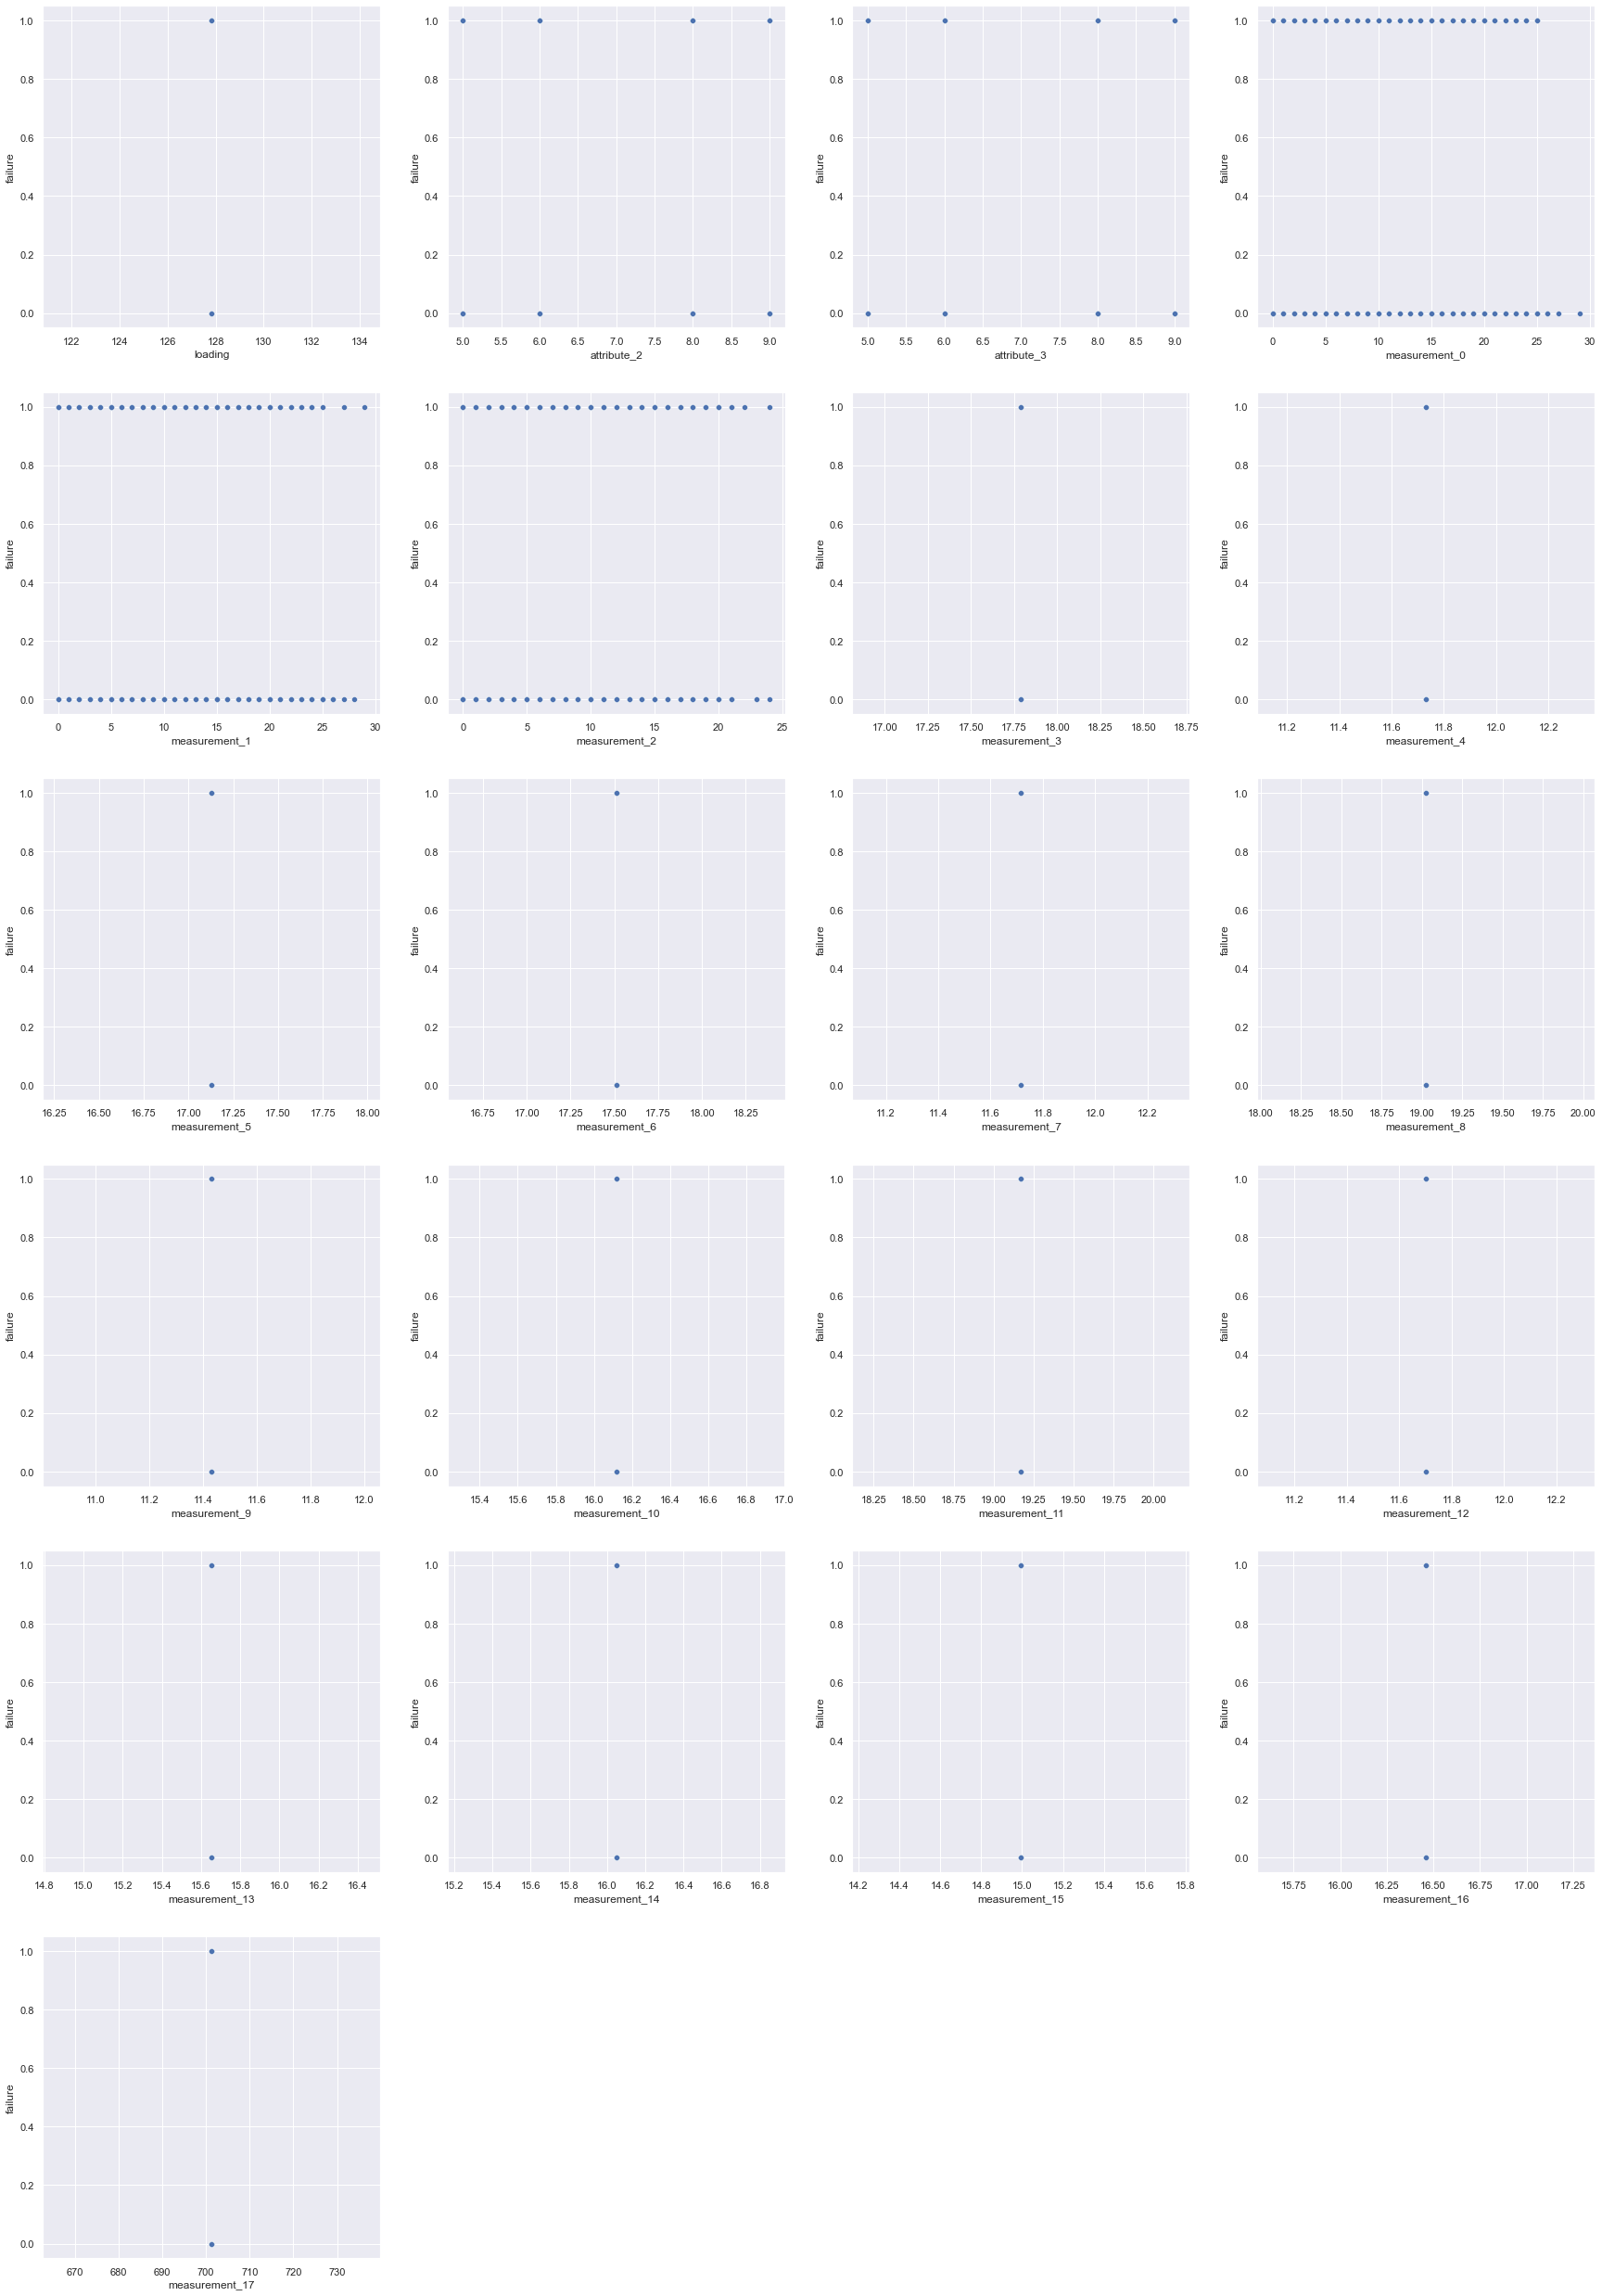

In [23]:
plt.figure(figsize= (30,60))
for i,col in enumerate(numeric_columns):
    plt.subplot(8,4,i+1)
    sns.scatterplot(x=col, y="failure", data=train_data) 

# Data Preprocessing 

In [24]:
categorical_columns=["product_code","attribute_0","attribute_1"]
ordainal_encoder=OrdinalEncoder()
train_data[categorical_columns]=ordainal_encoder.fit_transform(train_data[categorical_columns])
test_data[categorical_columns]=ordainal_encoder.fit_transform(test_data[categorical_columns])

In [25]:
train_data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,127.826233,1.0,2.0,9,5,7,8,4,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
1,0.0,127.826233,1.0,2.0,9,5,14,3,3,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
2,0.0,127.826233,1.0,2.0,9,5,12,1,5,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
3,0.0,127.826233,1.0,2.0,9,5,13,2,6,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
4,0.0,127.826233,1.0,2.0,9,5,9,2,8,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0


In [26]:
test_data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.0,127.634895,0.0,1.0,6,4,6,9,6,17.793466,...,19.030765,11.417921,16.123986,18.846571,11.91423,15.736104,16.123958,15.115915,16.636052,701.389816
1,0.0,127.634895,0.0,1.0,6,4,11,8,0,17.793466,...,19.030765,11.417921,16.123986,18.846571,11.91423,15.736104,16.123958,15.115915,16.636052,701.389816
2,0.0,127.634895,0.0,1.0,6,4,8,12,4,17.793466,...,19.030765,11.417921,16.123986,18.846571,11.91423,15.736104,16.123958,15.115915,16.636052,701.389816
3,0.0,127.634895,0.0,1.0,6,4,8,11,10,17.793466,...,19.030765,11.417921,16.123986,18.846571,11.91423,15.736104,16.123958,15.115915,16.636052,701.389816
4,0.0,127.634895,0.0,1.0,6,4,14,16,8,17.793466,...,19.030765,11.417921,16.123986,18.846571,11.91423,15.736104,16.123958,15.115915,16.636052,701.389816


# Feature Scaling

In [27]:
x=train_data.drop("failure",axis=1)
y=train_data.failure
#column id not important


In [28]:
x=np.log(x)
test_data=np.log(test_data)

In [29]:
from numpy import inf
x[x==-inf]=0
test_data[test_data==-inf]=0

In [30]:
x

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.000000,4.850672,0.0,0.693147,2.197225,1.609438,1.945910,2.079442,1.386294,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
1,0.000000,4.850672,0.0,0.693147,2.197225,1.609438,2.639057,1.098612,1.098612,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
2,0.000000,4.850672,0.0,0.693147,2.197225,1.609438,2.484907,0.000000,1.609438,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
3,0.000000,4.850672,0.0,0.693147,2.197225,1.609438,2.564949,0.693147,1.791759,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
4,0.000000,4.850672,0.0,0.693147,2.197225,1.609438,2.197225,0.693147,2.079442,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,1.386294,4.850672,0.0,0.000000,1.791759,2.197225,1.791759,2.772589,1.386294,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
26566,1.386294,4.850672,0.0,0.000000,1.791759,2.197225,2.302585,2.484907,2.079442,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
26567,1.386294,4.850672,0.0,0.000000,1.791759,2.197225,0.000000,2.302585,0.000000,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892
26568,1.386294,4.850672,0.0,0.000000,1.791759,2.197225,0.693147,2.197225,1.386294,2.878722,...,2.945739,2.436305,2.779919,2.953455,2.459799,2.750656,2.775612,2.707754,2.800977,6.552892


# Feature Selection

[0.0009259  0.         0.         0.00051512 0.00088093 0.0013152
 0.34577519 0.35348863 0.29709904 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


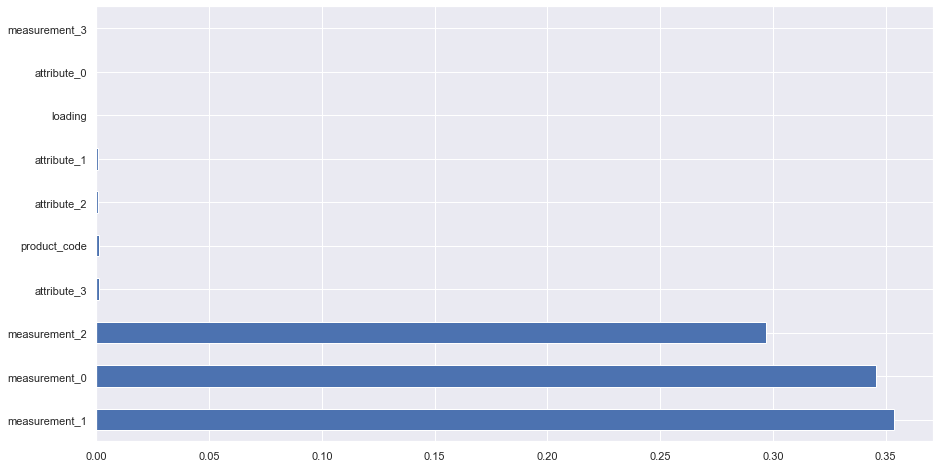

In [31]:
# corr = train_data.corr()
# top_feature = corr.index[abs(corr['failure'])>0.5]
# #Correlation plot
# plt.subplots(figsize=(12, 8))
# top_corr = train_data[top_feature].corr()
# sns.heatmap(top_corr, annot=True)
# plt.show()
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
train_data

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,127.826233,1.0,2.0,9,5,7,8,4,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
1,0.0,127.826233,1.0,2.0,9,5,14,3,3,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
2,0.0,127.826233,1.0,2.0,9,5,12,1,5,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
3,0.0,127.826233,1.0,2.0,9,5,13,2,6,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
4,0.0,127.826233,1.0,2.0,9,5,9,2,8,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,4.0,127.826233,1.0,1.0,6,9,6,16,4,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
26566,4.0,127.826233,1.0,1.0,6,9,10,12,8,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
26567,4.0,127.826233,1.0,1.0,6,9,1,10,1,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
26568,4.0,127.826233,1.0,1.0,6,9,2,9,4,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0


In [33]:
train_data

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,127.826233,1.0,2.0,9,5,7,8,4,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
1,0.0,127.826233,1.0,2.0,9,5,14,3,3,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
2,0.0,127.826233,1.0,2.0,9,5,12,1,5,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
3,0.0,127.826233,1.0,2.0,9,5,13,2,6,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
4,0.0,127.826233,1.0,2.0,9,5,9,2,8,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,4.0,127.826233,1.0,1.0,6,9,6,16,4,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
26566,4.0,127.826233,1.0,1.0,6,9,10,12,8,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
26567,4.0,127.826233,1.0,1.0,6,9,1,10,1,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0
26568,4.0,127.826233,1.0,1.0,6,9,2,9,4,17.791528,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0


In [34]:
top_feature=['measurement_0','measurement_1','measurement_2','attribute_3','product_code','attribute_2']

In [35]:
train_X=train_data[top_feature]
test_X=test_data[top_feature]


# Modeling

# using XGBClassifier()

In [36]:
XGB_model=XGBClassifier()
XGB_model.fit(train_X,y)
xGB_prediction=XGB_model.predict(test_X)


# Using RandomForestClassifier

In [37]:
RF_model=RandomForestClassifier()
RF_model.fit(train_X,y)
RF_prediction=RF_model.predict(test_X)

# Using DecisionTreeClassifier

In [38]:
DT_model=DecisionTreeClassifier()
DT_model.fit(train_X,y)
DT_Prediction=DT_model.predict(test_X)

# Submission

In [39]:
sample_submission['failure']=np.exp(DT_Prediction)
sample_submission.to_csv('submission.csv',index=False)
display(sample_submission)

,id,failure
0,26570,1.0
1,26571,1.0
2,26572,1.0
3,26573,1.0
4,26574,1.0
...,...,...
20770,47340,1.0
20771,47341,1.0
20772,47342,1.0
20773,47343,1.0
